In [ ]:
########################################################################################################################
#
# Script name               - nCov-Corana-Virus-Data-exploration-outlook.ipynb
# Script description        - This notebook have Corona Virus 🦠  Data exploration notebook
# Usage                     - 
# Input Params needed       - 
#
#
#  Date                        Author                        Modification                       Description
# =====                       =======                        =============                     =============
# 01-Feb-2020                 Praveen G                        Created
#
#
########################################################################################################################

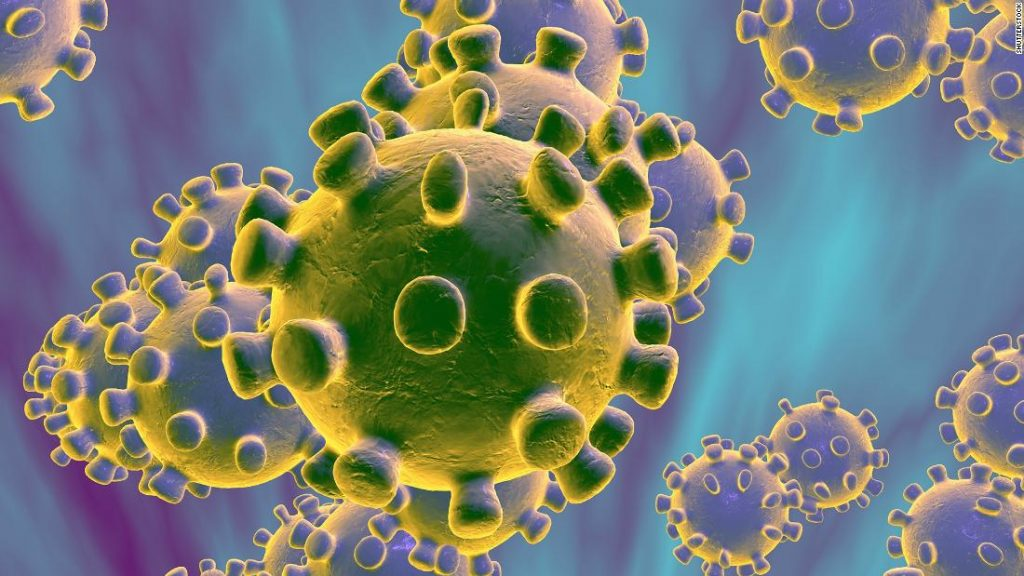

In [49]:
from IPython.display import Image
Image(filename='Coronavirus-super-tease-1024x576.jpg')

## Introduction
The 2019-nCoV is a contagious coronavirus that hailed from Wuhan, China. This new strain of virus has striked fear in many countries as cities are quarantined and hospitals are overcrowded. 

Most coronaviruses spread a similar way other cold-causing infections do: through tainted individuals hacking and sniffling, by contacting a contaminated individual's hands or face, or by contacting things, for example, door handles that contaminated individuals have contacted.

Nearly everybody gets a coronavirus disease in any event once in their life, probably as a small kid. Accross globe , coronaviruses are increasingly basic in the fall and winter, yet anybody can contract a coronavirus disease whenever

How coronavirus have grow in 2019Q4 & 2020Q1 and what is his cases distribution in China and other countries are questions to be answered by this kernel.

## Importing necessary libraries 

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [59]:
#Import Plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

%matplotlib inline
import squarify
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}

matplotlib.rcParams.update({'font.size': 30})

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

## Import dataset

In [7]:
# loading dataset
df_cov = pd.read_csv('2019_nCoV_20200121_20200131.csv'
                  , header=0
                  , names=['state','country','last_update','confirmed','suspected','recovered','death'])

In [9]:
df_cov.head(10)

,state,country,last_update,confirmed,suspected,recovered,death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN
5,Jiangxi,Mainland China,1/31/2020 19:00,240.0,NaN,7.0,NaN
6,Chongqing,Mainland China,1/31/2020 19:00,238.0,NaN,1.0,1.0
7,Anhui,Mainland China,1/31/2020 19:00,237.0,NaN,3.0,NaN
8,Shandong,Mainland China,1/31/2020 19:00,184.0,NaN,2.0,NaN
9,Sichuan,Mainland China,1/31/2020 19:00,177.0,NaN,1.0,1.0


In [13]:
df_cov.describe()

,confirmed,suspected,recovered,death
count,1095.000000,88.000000,247.000000,127.000000
mean,90.517808,22.613636,8.040486,17.913386
std,465.644496,48.177696,21.236339,46.025187
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,9.000000,4.000000,2.000000,1.000000
75%,46.000000,22.000000,4.000000,2.000000
max,7153.000000,244.000000,169.000000,249.000000


## Data Preprocessing

In [15]:
# converting last_update colum to datetime format
df_cov['last_update'] = df_cov['last_update'].apply(pd.to_datetime)

In [16]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 7 columns):
state          889 non-null object
country        1125 non-null object
last_update    1125 non-null datetime64[ns]
confirmed      1095 non-null float64
suspected      88 non-null float64
recovered      247 non-null float64
death          127 non-null float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 61.6+ KB


### Analyse the Missing Values

In [18]:
df_cov.isnull().sum()

state           236
country           0
last_update       0
confirmed        30
suspected      1037
recovered       878
death           998
dtype: int64

### Dataset is not clean , So many values are blank. This dataset need data imputation before we gonna start the data analysis 

In [20]:
df_cov['state'].fillna('UnKnown',inplace=True)
df_cov.fillna(0,inplace=True)

In [21]:
df_cov.isnull().sum()

state          0
country        0
last_update    0
confirmed      0
suspected      0
recovered      0
death          0
dtype: int64

### Great dataset is ok , lets start the outlook

### China 

Total cases by state in China
To plot the number of cases in China first let's create a subset with cases in Mainland China, after that we need to take the updated number of cases for each state, here i assumed that the last update had the higher number of confirmed cases

In [23]:
df_china = df_cov[['state','confirmed','suspected','recovered','death']][cov['country']=='Mainland China']

# taking the max value by state
df_china = df_china[['confirmed','suspected','recovered','death']].groupby(cov['state']).max()

In [25]:
df_china.describe()

,confirmed,suspected,recovered,death
count,31.000000,31.000000,31.000000,31.000000
mean,362.000000,10.000000,7.870968,8.419355
std,1267.362327,18.009257,30.102870,44.654059
min,1.000000,0.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,0.000000
50%,88.000000,1.000000,1.000000,0.000000
75%,210.500000,12.000000,3.000000,1.000000
max,7153.000000,72.000000,169.000000,249.000000


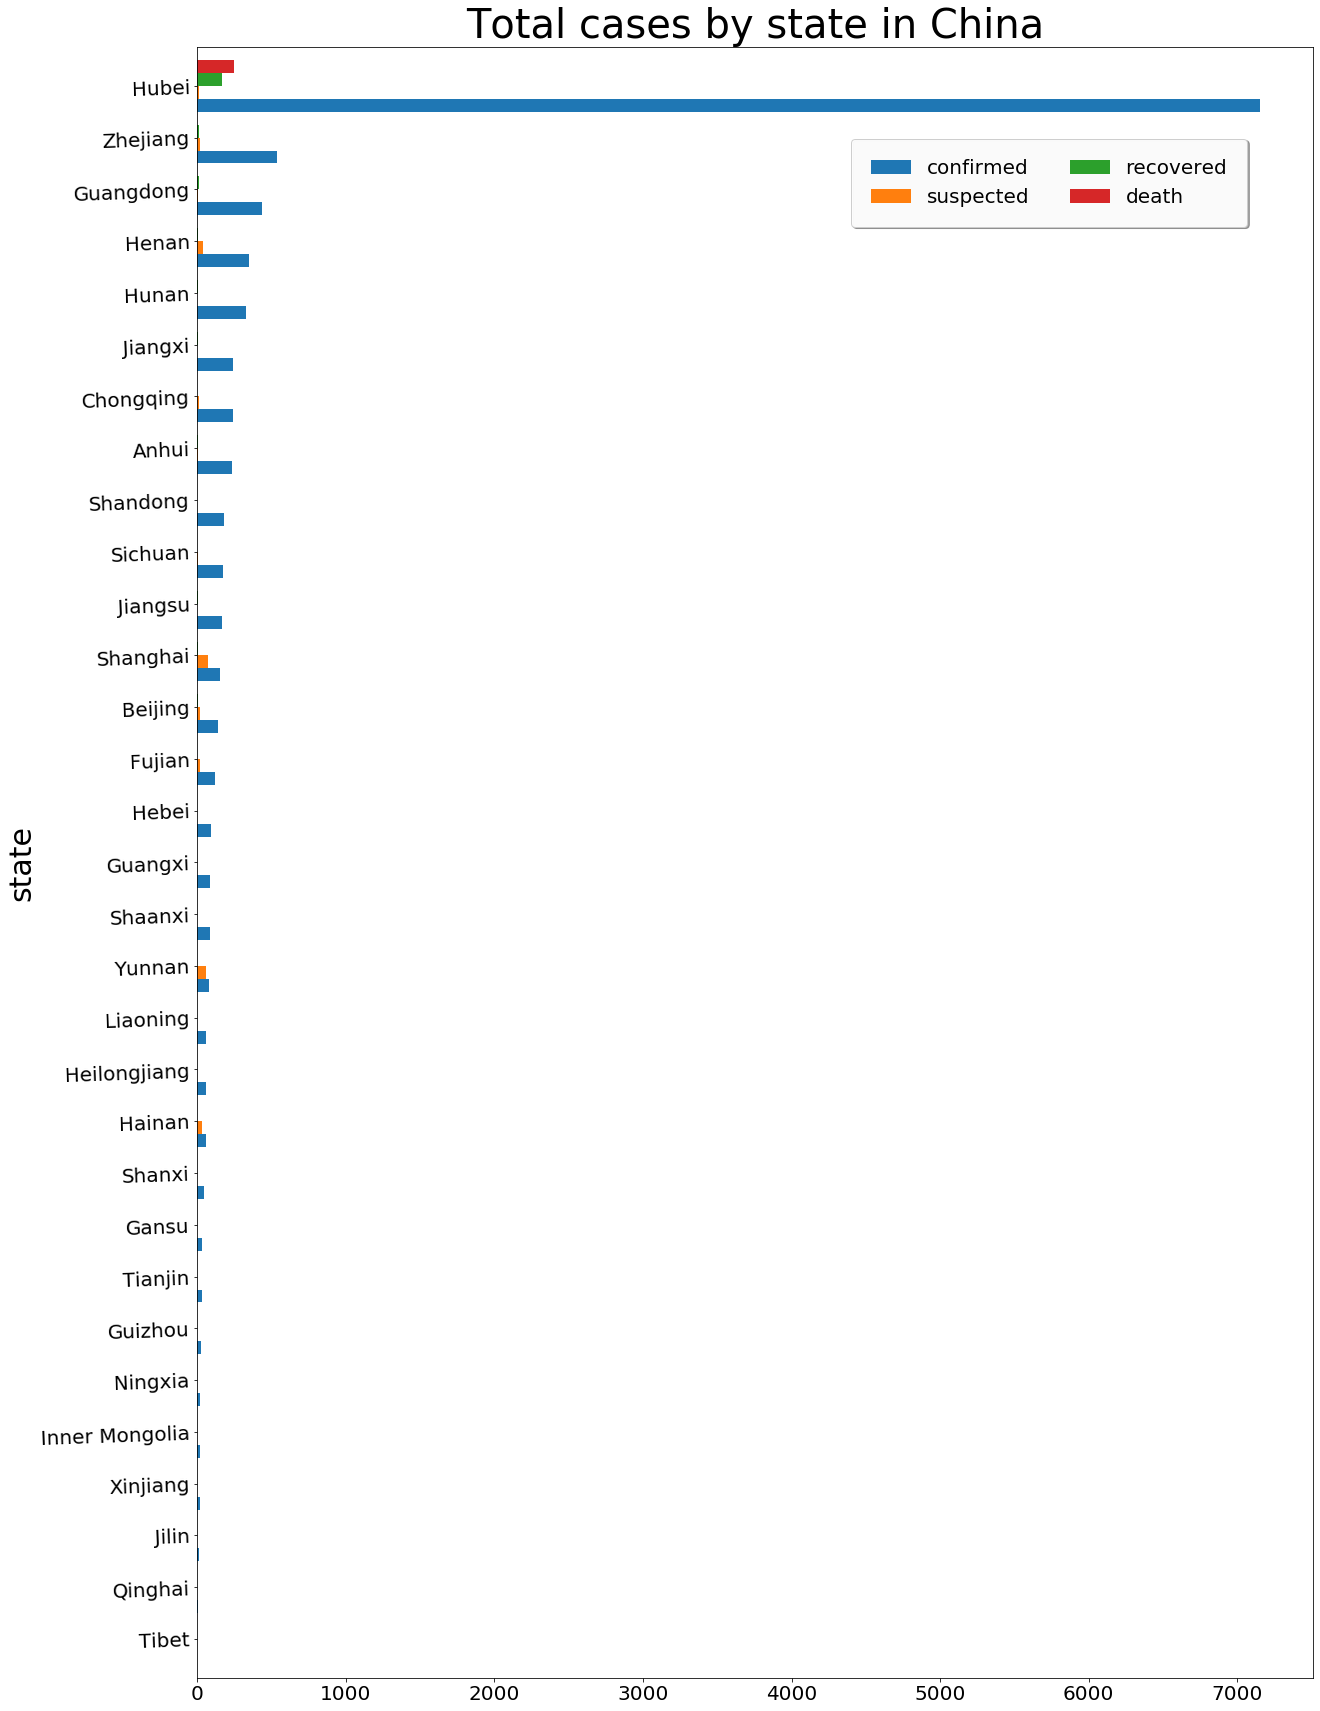

In [27]:
df_china.sort_values(by='confirmed',ascending=True).plot(kind='barh',figsize=(20,30),width=1,rot=2)
# defyning legend and titles parameters
plt.title('Total cases by state in China',size=40)
plt.ylabel('state',size=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(bbox_to_anchor=(0.95,0.95) # setting coordinates for the caption box
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

### In Chinese State Hubei Confimed cases is outnumbered other chinese state 

### Lets deepdive into Hubei Cases Distribution
Clearly Hubei have the higher case numbers, if we take a more detailed look into Hubei data with a pie chart we can see the same distribution above but with more detalies, 94.6% of the cases was confirmed, 3.3% of infected people had died, 1.9% recovered and only 0.2% are suspect.

In [30]:
df_china_hubei = df_china[df_china.index=='Hubei']

In [32]:
df_china_hubei = df_china_hubei.iloc[0]

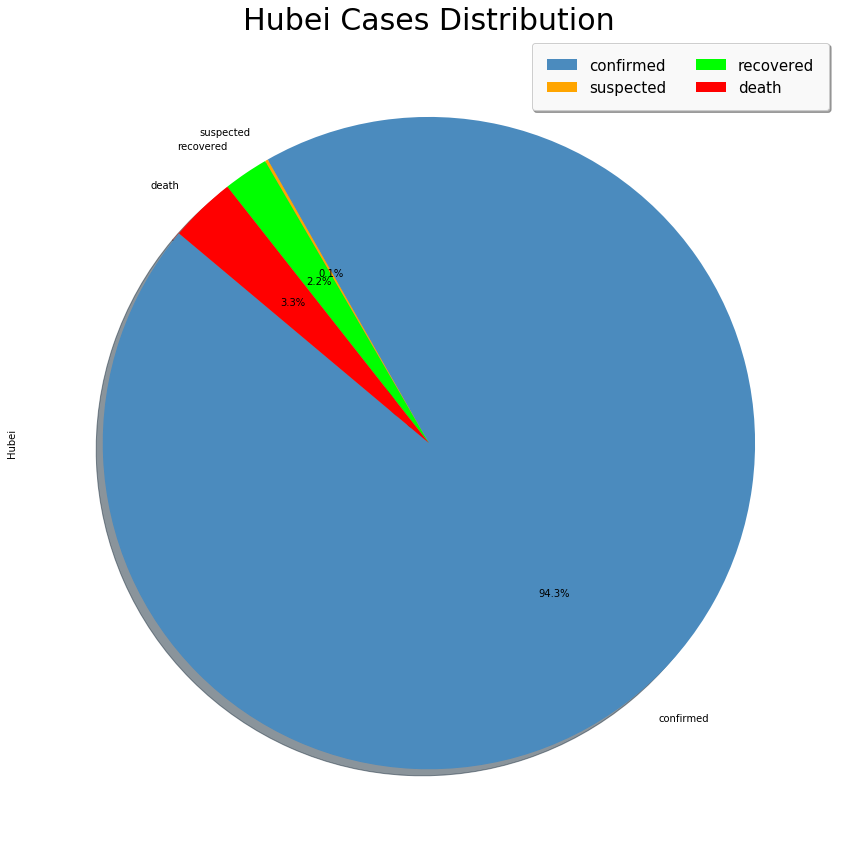

In [34]:

plt.figure(figsize=(15,15))

# here i use .value_counts() to count the frequency that each category occurs of dataset
df_china_hubei.plot(kind='pie'
           , colors=['#4b8bbe','orange','lime','red']
           , autopct='%1.1f%%' # adding percentagens
           , shadow=True
           , startangle=140)

# titles and legend parameters
plt.title('Hubei Cases Distribution',size=30)
plt.legend(loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

## Outlook 
3.3% Confirmed cases are dead in Hubei , 2.2 % of cases are suspected 

## Case tend in China 

In [40]:
df_chn_cases_grth = df_cov[['last_update','confirmed','suspected','recovered','death']][df_cov['country']=='Mainland China']

df_chn_conf_grth = df_chn_cases_grth[['confirmed']].groupby(df_chn_cases_grth['last_update']).sum()
df_chn_sus_grth = df_chn_cases_grth[['suspected']].groupby(cov['last_update']).sum()
df_chn_rec_grth = df_chn_cases_grth[['recovered']].groupby(cov['last_update']).sum()
df_chn_death_grth = df_chn_cases_grth[['death']].groupby(cov['last_update']).sum()

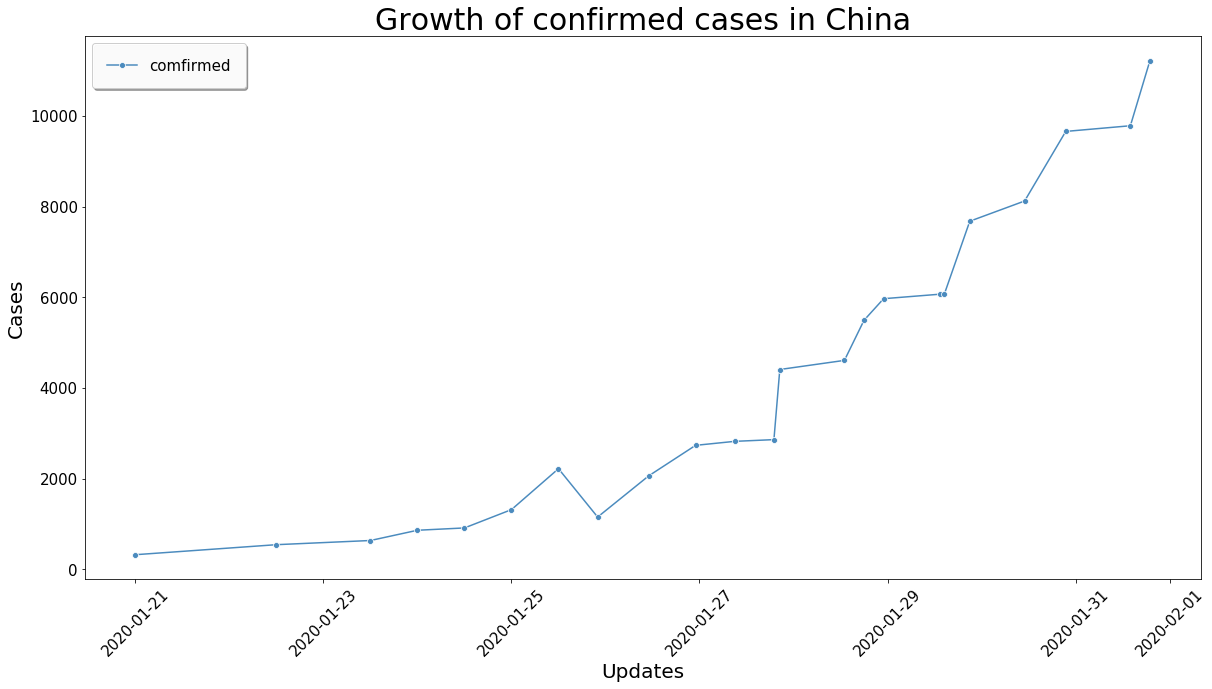

In [41]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating the plot
sns.lineplot(x = df_chn_conf_grth.index
        , y = 'confirmed'
        , color = '#4b8bbe'
        , label = 'comfirmed'
        , marker = 'o'
        , data = df_chn_conf_grth)

# titles parameters
plt.title('Growth of confirmed cases in China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

## oops 🙊 there is exponential increase of confirmed cases between 25-Jan - 1st Feb 2020 

In [ ]:
df_chn_cases_grth = df_cov[['last_update','confirmed','suspected','recovered','death']][df_cov['country']=='Mainland China']

df_chn_conf_grth = df_chn_cases_grth[['confirmed']].groupby(df_chn_cases_grth['last_update']).sum()
df_chn_sus_grth = df_chn_cases_grth[['suspected']].groupby(cov['last_update']).sum()
df_chn_rec_grth = df_chn_cases_grth[['recovered']].groupby(cov['last_update']).sum()
df_chn_death_grth = df_chn_cases_grth[['death']].groupby(cov['last_update']).sum()

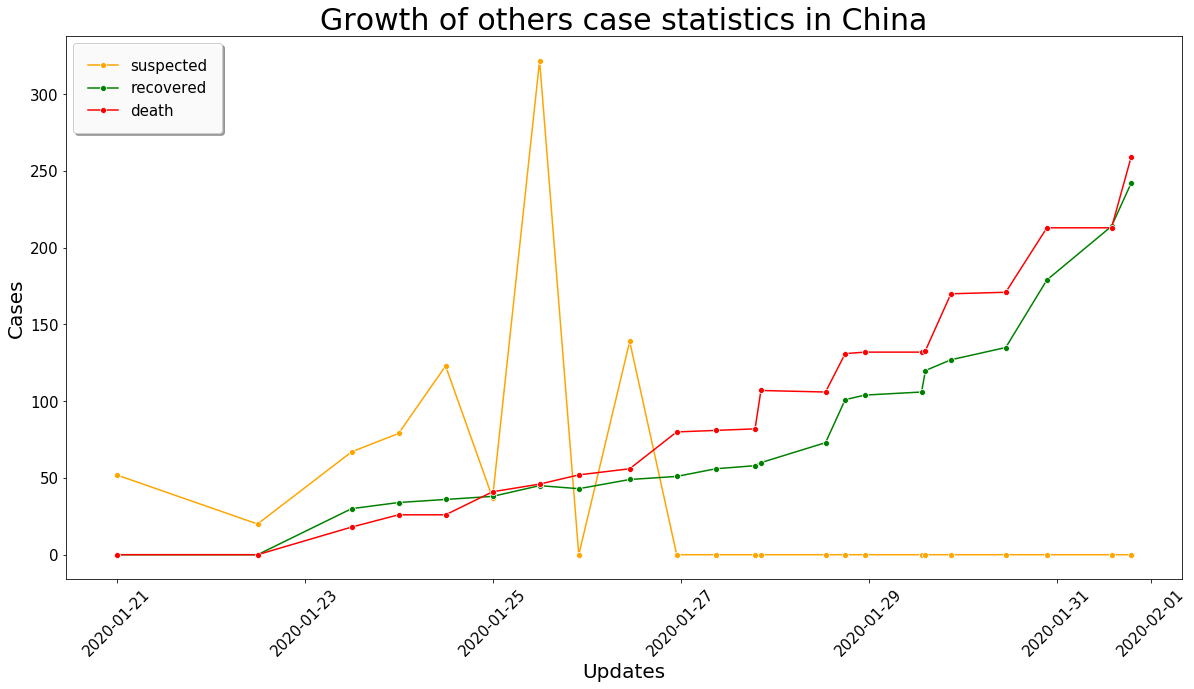

In [43]:

plt.figure(figsize=(20,10))

# creating a lineplot for each case variable(suspected, recovered and death)
sns.lineplot(x = df_chn_sus_grth.index
        , y = 'suspected'
        , color = 'orange'
        , label = 'suspected'
        , marker = 'o'
        , data = df_chn_sus_grth)

sns.lineplot(x = df_chn_rec_grth.index
        , y = 'recovered'
        , color = 'green'
        , label = 'recovered'
        , marker = 'o'
        , data = df_chn_rec_grth)

sns.lineplot(x = df_chn_death_grth.index
        , y = 'death'
        , color = 'red'
        , label = 'death'
        , marker = 'o'
        , data = df_chn_death_grth)

# Titles, labels and ticks parameters
plt.title('Growth of others case statistics in China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

## Phase of Recovered cases is catching up with death , But rate of death cases is growning

## Lets look globally apart from China 

In [44]:
# taking all cases that are not in China
other_countries = df_cov[['country','confirmed','suspected','recovered','death']][df_cov['country']!='Mainland China']

# taking cases by country
other_countries = other_countries[['confirmed','suspected','recovered','death']].groupby(other_countries['country']).max()

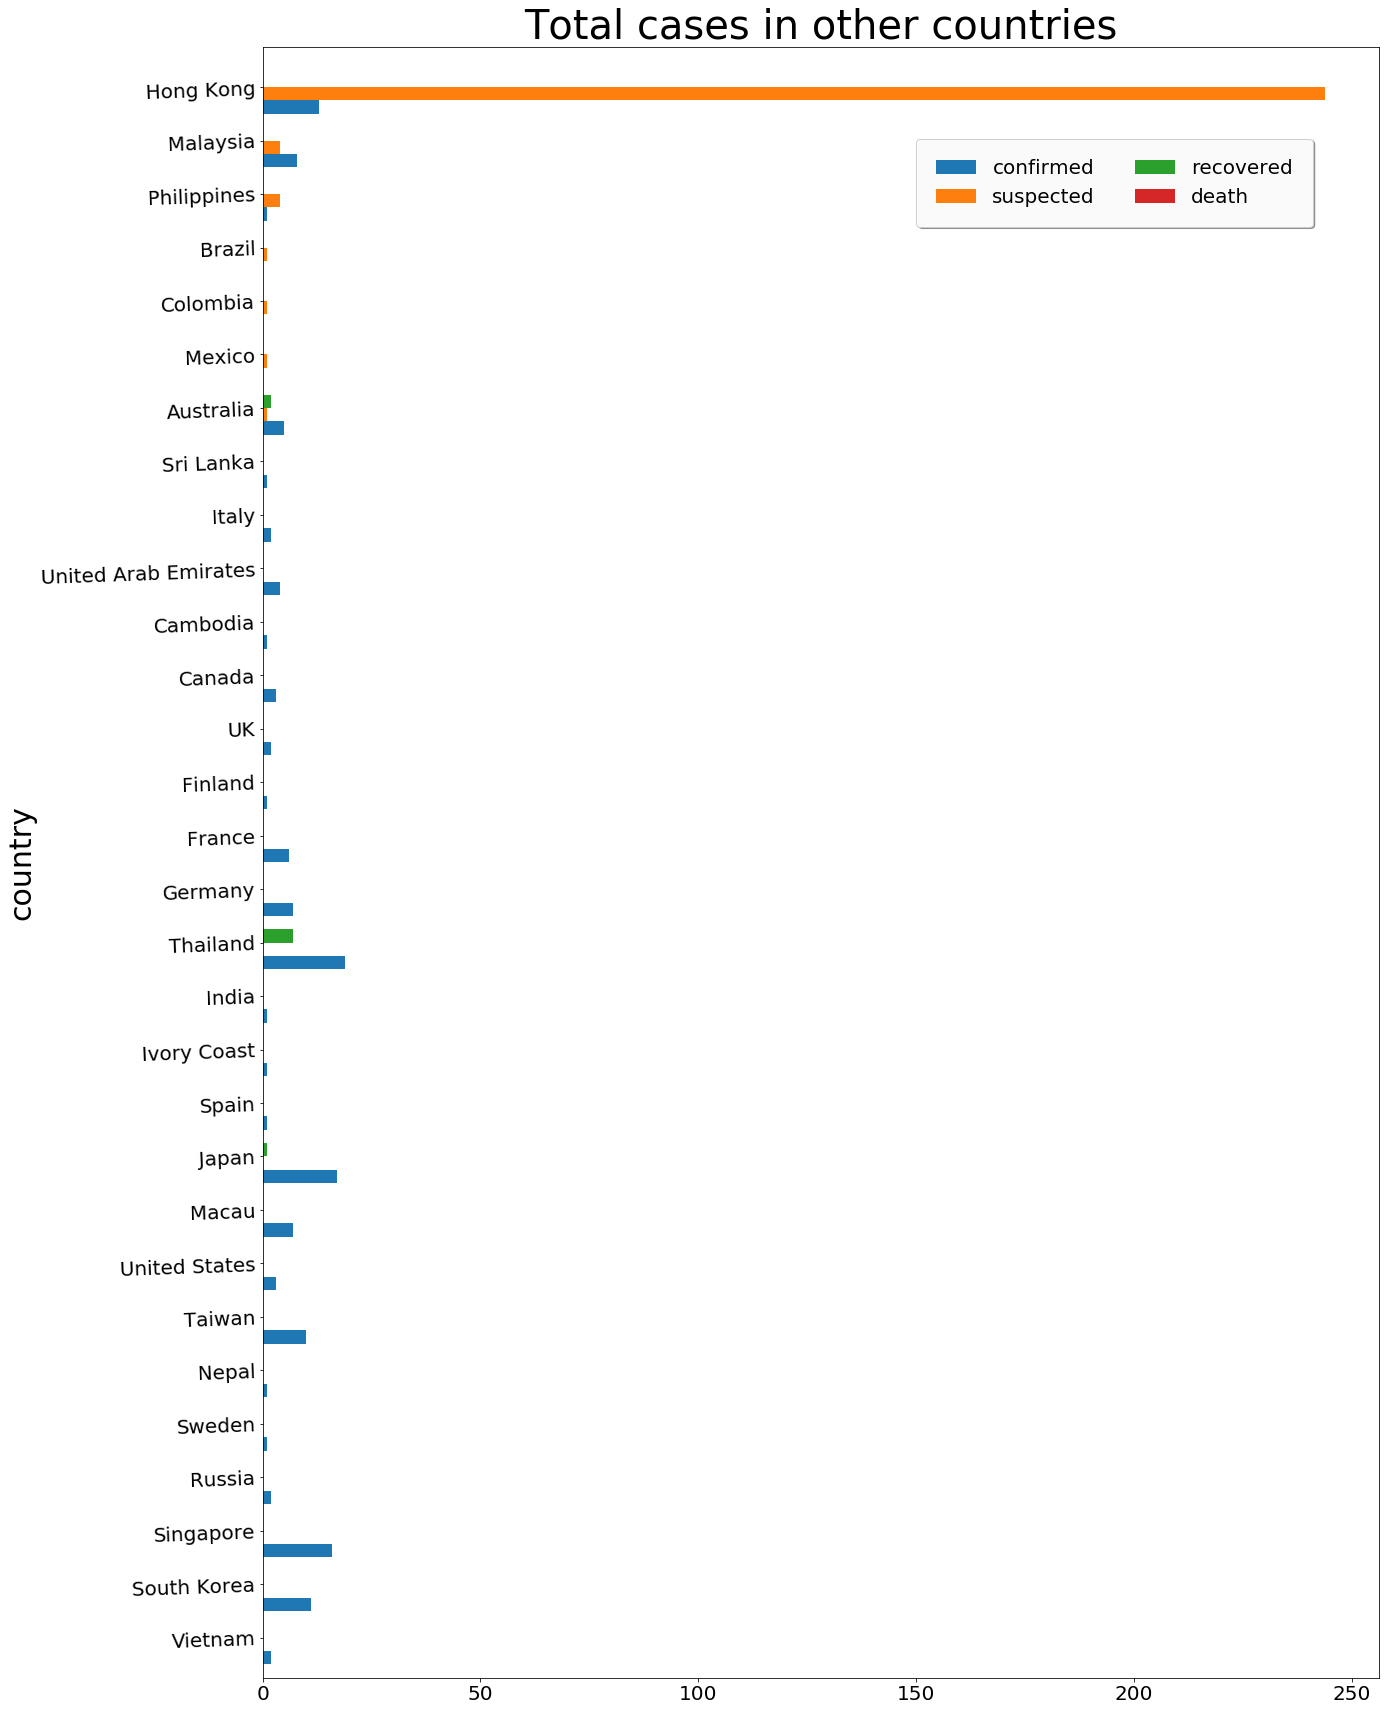

In [45]:
# creating the plot
other_countries.sort_values(by='suspected',ascending=True).plot(kind='barh',figsize=(20,30), width=1,rot=2)

# defyning titles, labels, xticks and legend parameters
plt.title('Total cases in other countries',size=40)
plt.ylabel('country',size=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(bbox_to_anchor=(0.95,0.95)
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

## Based on the above data , Confirmed cases are comming from China . There is 14 day time period of Suspect & Confimed
## HK & MY - There is possibilty of spread (My hypothesis)

## Lets deepdive into HongKong

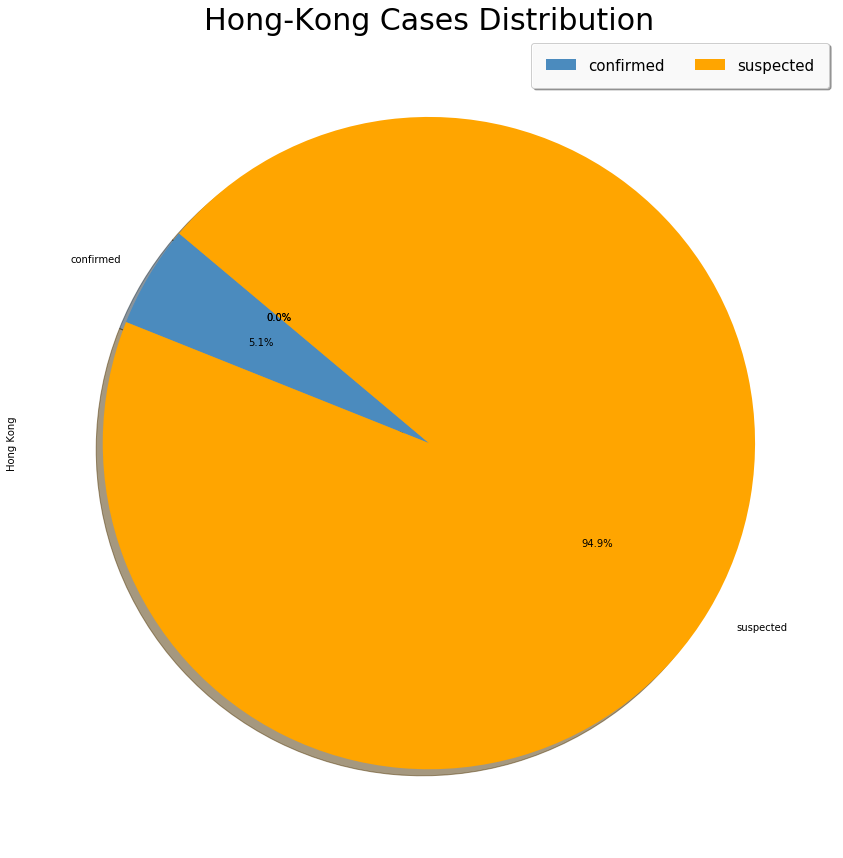

In [46]:
# taking cases in Hong-Kong
Hong_Kong = other_countries[other_countries.index=="Hong Kong"]
Hong_Kong = Hong_Kong.iloc[0]

# difyning plot size
plt.figure(figsize=(15,15))

 # here i use .value_counts() to count the frequency that each category occurs of dataset
Hong_Kong.plot(kind='pie'
           , colors=['#4b8bbe','orange']
           , autopct='%1.1f%%' # adding percentagens
           , shadow=True
           , startangle=140)

# defyning title and legend parameters
plt.title('Hong-Kong Cases Distribution',size=30)
plt.legend(loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [47]:
# taking cases from countries that are not China
other_countries_cases = df_cov[['country','last_update','confirmed','suspected','recovered','death']][df_cov['country']!='Mainland China']

# Taking total of confirmed cases countries
other_countries_confirmed = other_countries_cases[['last_update','confirmed']].groupby(cov['country']).max()
other_countries_cases_growth = other_countries_confirmed[['confirmed']].groupby(other_countries_confirmed['last_update']).sum()

# Taking total of suspected cases countries
other_countries_suspected = other_countries_cases[['last_update','suspected']].groupby(cov['country']).max()
other_countries_suspected_growth = other_countries_suspected[['suspected']].groupby(other_countries_suspected['last_update']).sum()

# Taking total of recovered cases countries
other_countries_recovered = other_countries_cases[['last_update','recovered']].groupby(cov['country']).max()
other_countries_recovered_growth = other_countries_recovered[['recovered']].groupby(other_countries_recovered['last_update']).sum()

# Taking total of death cases countries
other_countries_death = other_countries_cases[['last_update','death']].groupby(cov['country']).max()
other_countries_death_growth = other_countries_death[['death']].groupby(other_countries_death['last_update']).sum()

# Joing all case types in one dataset adding new columns
other_countries_cases_growth['suspected'] = other_countries_suspected_growth['suspected']
other_countries_cases_growth['recovered'] = other_countries_recovered_growth['recovered']
other_countries_cases_growth['death'] = other_countries_death_growth['death']

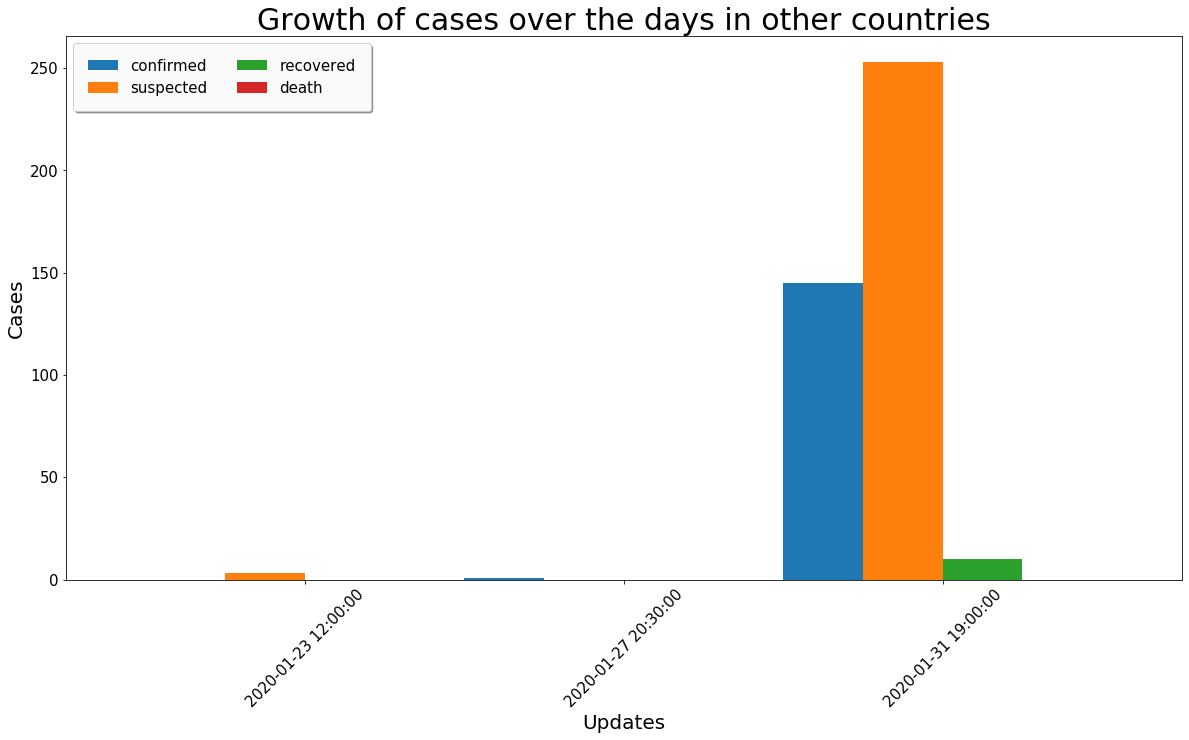

In [48]:
# creating the plot
other_countries_cases_growth.plot(kind='bar',figsize=(20,10), width=1,rot=2)

# Title, labels, ticks and legend parameters
plt.title('Growth of cases over the days in other countries',size=30)
plt.xlabel('Updates', size=20)
plt.ylabel('Cases', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

## oops 😬 , Confirmed cases numbers getting increased in other countries apart from China

In [61]:
df_cov.head()

,state,country,last_update,confirmed,suspected,recovered,death
0,Hubei,Mainland China,2020-01-31 19:00:00,7153.0,0.0,169.0,249.0
1,Zhejiang,Mainland China,2020-01-31 19:00:00,537.0,0.0,14.0,0.0
2,Guangdong,Mainland China,2020-01-31 19:00:00,436.0,0.0,10.0,0.0
3,Henan,Mainland China,2020-01-31 19:00:00,352.0,0.0,3.0,2.0
4,Hunan,Mainland China,2020-01-31 19:00:00,332.0,0.0,3.0,0.0


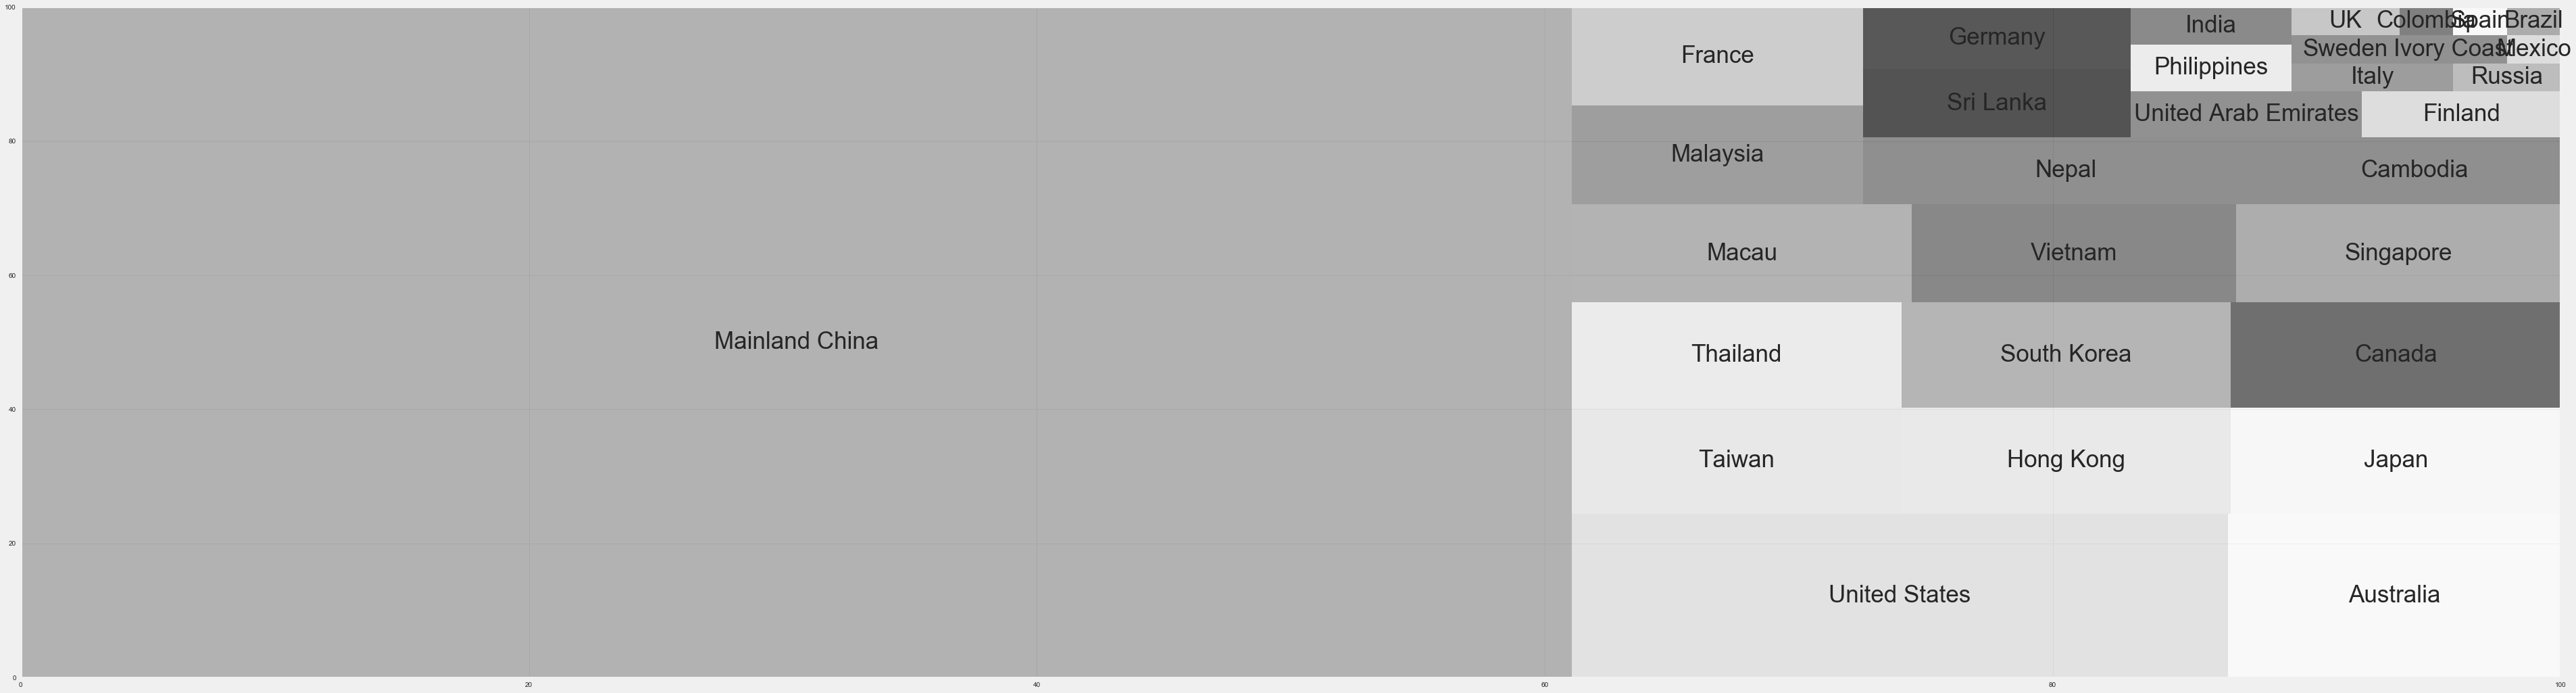

In [62]:
matplotlib.rcParams.update({'font.size': 35})

plt.figure(figsize=(60,17))
country_count = df_cov['country'].value_counts()
squarify.plot(sizes=country_count.values,label=country_count.index,alpha=0.7)

## Growth of Confimed cases in all countries 

Text(0, 0.5, 'Confirmed count')

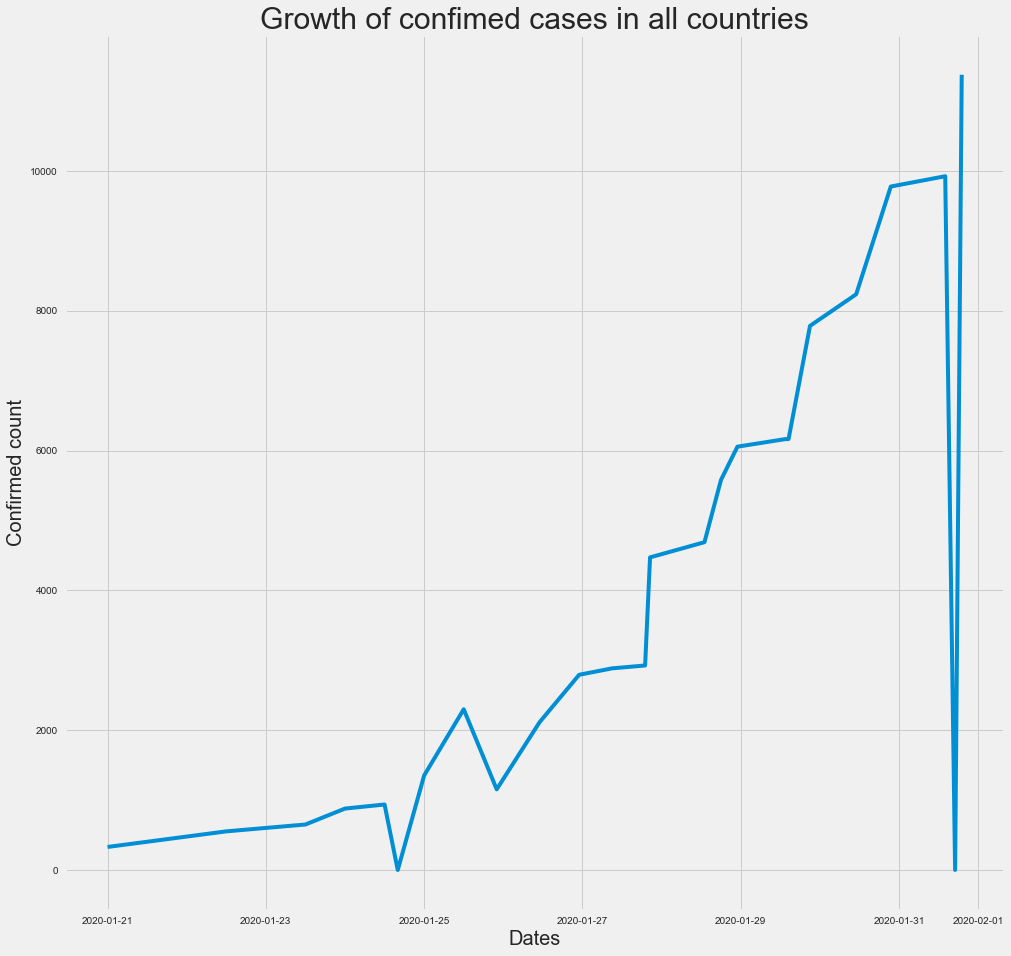

In [75]:
plt.figure(figsize=(15,15))
sns.lineplot(x='last_update' ,y= 'confirmed',data = df_cov.groupby(['last_update']).agg({'confirmed':sum}).reset_index())
plt.title('Growth of confimed cases in all countries',size=30)
plt.xlabel('Dates', size=20)
plt.ylabel('Confirmed count', size=20)

In [77]:
from bokeh.plotting import figure, show

from bokeh.io import output_notebook

from bokeh.models import ColumnDataSource, HoverTool

from bokeh.transform import dodge

output_notebook()

Loading BokehJS ...

In [79]:
df_sum = df_cov.groupby(by='last_update').sum()

In [82]:
a = df_sum['confirmed'].iloc[:-1].reset_index(drop=True)
b = df_sum['confirmed'].iloc[1:].reset_index(drop=True)
chg = b - a
df_increase = df_sum.iloc[1:,:]
pd.options.mode.chained_assignment = None
df_increase['chg'] = chg.values
df_increase['date'] = df_increase.index.map(lambda x: x.strftime('%Y-%m-%d'))
df_increase

,confirmed,suspected,recovered,death,chg,date
last_update,,,,,,
2020-01-22 12:00:00,555.0,137.0,0.0,0.0,223.0,2020-01-22
2020-01-23 12:00:00,653.0,144.0,30.0,18.0,98.0,2020-01-23
2020-01-24 00:00:00,881.0,115.0,34.0,26.0,228.0,2020-01-24
2020-01-24 12:00:00,939.0,159.0,36.0,26.0,58.0,2020-01-24
2020-01-24 16:00:00,2.0,0.0,0.0,0.0,-937.0,2020-01-24
2020-01-25 00:00:00,1354.0,73.0,38.0,41.0,1352.0,2020-01-25
2020-01-25 12:00:00,2301.0,810.0,45.0,46.0,947.0,2020-01-25
2020-01-25 22:00:00,1156.0,0.0,43.0,52.0,-1145.0,2020-01-25
2020-01-26 11:00:00,2116.0,383.0,52.0,56.0,960.0,2020-01-26


In [83]:
p = figure(x_range=list(df_increase.index.format()), title="Increased Number of global Confirmed", plot_width=800, plot_height=350)
p.vbar(x=list(df_increase.index.format()), top=list(df_increase['chg']), width=0.2)
p.line(x=list(df_increase.index.format()), y=list(df_increase['chg']))
p.circle(x=list(df_increase.index.format()), y=list(df_increase['chg']), fill_color="white", size=8)    

p.xgrid.grid_line_color = None
p.y_range.start = 0

p.add_tools(HoverTool(tooltips=[("Date", "@x"), ("Increaed Number", "@top")]))

show(p)

In [85]:
df_cov_pear_corr = df_cov.corr(method='pearson')

In [86]:
df_cov_pear_corr

,confirmed,suspected,recovered,death
confirmed,1.000000,-0.019668,0.976587,0.983730
suspected,-0.019668,1.000000,-0.018758,-0.014190
recovered,0.976587,-0.018758,1.000000,0.981229
death,0.983730,-0.014190,0.981229,1.000000


## Lets look at the correlation

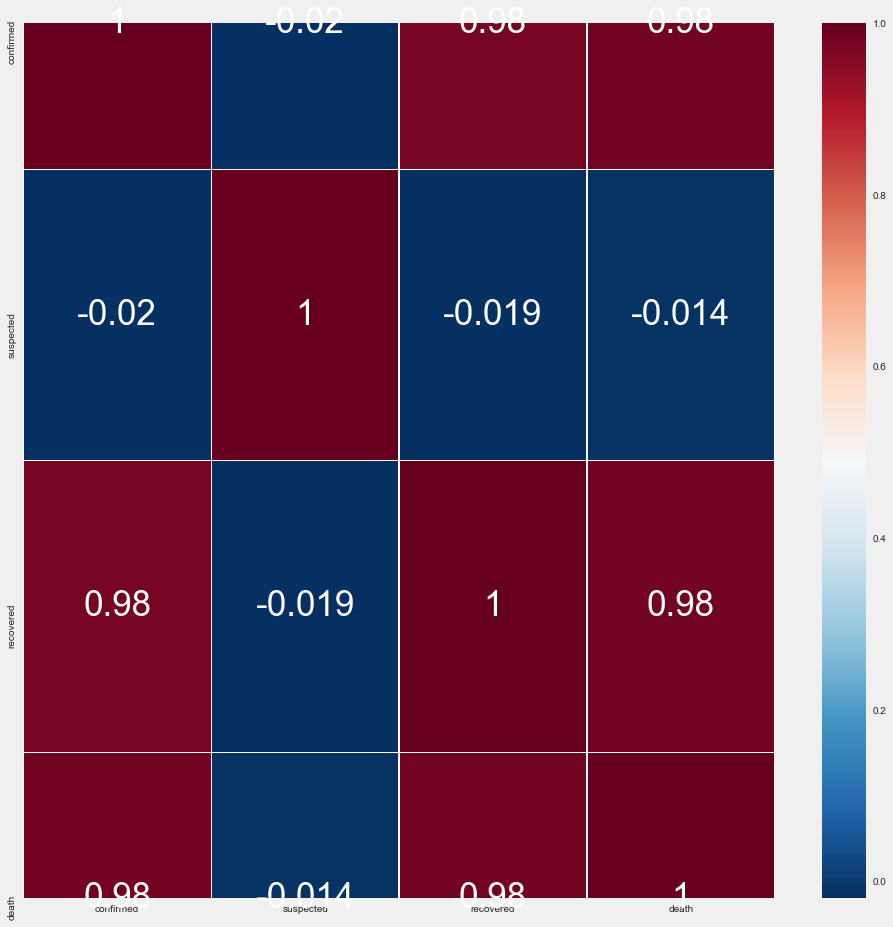

In [92]:
plt.figure(figsize=(15,15))
sns.heatmap(df_cov_pear_corr.values, 
            xticklabels=df_cov_pear_corr.columns,
            yticklabels=df_cov_pear_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.2)

<Figure size 1440x1440 with 0 Axes>

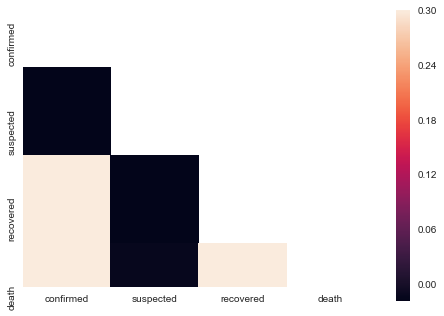

In [98]:

mask = np.zeros_like(df_cov_pear_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(20,20))
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(df_cov_pear_corr, mask=mask, vmax=.3, square=True)

# Conclusion

#### Based on the data at hand ,There is huge probability of recovery eventhough Corona Virus is confirmed
#### Rate of confirmed cases is increasing 3.3 % of confirmed cases are mortal, Every country need to fight fast to contain the pandamic
#### Rate of spead of n-Cov virus is getting exponential , It slows down the Global GDP because China alone contribure 20 % of Global GDP
#### At Global level , manufacturing sector and all other sector meets slowdown due to this pandemic